In [1]:
import numpy as np
import random
import pandas as pd
import math

In [2]:
#Part 1:
#=======

def calculate_Euclidean_distance(point):
    """
    Calculates the Euclidean distance from the center of the space
    given an arbitrary point.
    """
    point = np.power(point,2)
    result = math.sqrt(np.sum(point))
    return result

In [3]:
def multidimensional_volume_sphere(D, num_trials):
    """
    Calculates the value of the unit volume in a space of dimension D
    using a number of trials = num_trials.
    Returns a single value
    """
    multidimensional_square_area = math.pow(2,D) # because i'm using a square of length 2
    unit_radius = 1.0
    count = 0
    trial = 0

    while (trial<num_trials):
        point = np.random.uniform(-1,1,D)
        if (calculate_Euclidean_distance(point)<=unit_radius):
            count+=1
        trial+=1    
    
    return (count/num_trials)*multidimensional_square_area

In [4]:
#vectorize my multidimensional_volume_sphere
vec_multidimensional_volume_sphere = np.vectorize(multidimensional_volume_sphere)

In [5]:
#NB: This is the function the problem is asking

def calculate_volume(D,block_dim_trials=10000,total_runs=100):
    """
    Returns the volume as a string showing the error on the result
    D = dimension of space
    block_dim_trials = how many trials you want to make per run
    total_runs = total number of runs
    """
    list_trials = [block_dim_trials for i in range(total_runs)]
    volumes = vec_multidimensional_volume_sphere(D,list_trials)
    return str(volumes.mean())+' ± ' +str(volumes.std())

In [6]:
#Example 1: D=1
calculate_volume(1)

'2.0 ± 0.0'

In [7]:
# ... for D=1, the standard deviation on the volume simulated is 0 because every point we randomly generate
# falls between -1 and +1 (extrema included).

In [8]:
#Example 2: D=2
calculate_volume(2)

'3.1432919999999998 ± 0.015033493805499763'

In [9]:
#Example 3: D=3
calculate_volume(3)

'4.184664 ± 0.037313985367419526'

In [10]:
#Example 4: D=4
calculate_volume(4)

'4.941952 ± 0.07278261946371538'

In [11]:
#Example 5: D=5
calculate_volume(5)

'5.277056000000001 ± 0.11251873472448932'

In [12]:
#Part 2: proving the scaling of the standard deviation with N=number of trials
#=============================================================================

def std_volumes(D,N,total_runs=400):
    list_trials = [N for i in range(total_runs)]
    volumes = vec_multidimensional_volume_sphere(D,list_trials)
    return volumes.std()

vec_std_volumes = np.vectorize(std_volumes)

In [13]:
# I want to test this on the list of N, [100*(i**2) for i in range(1,11)]
list_of_N = np.array([100*(i**2) for i in range(1,11)])

In [14]:
list_of_N

array([  100,   400,   900,  1600,  2500,  3600,  4900,  6400,  8100,
       10000])

In [15]:
my_half_log_N = -0.5*np.log10(list_of_N)

In [16]:
my_half_log_N

array([-1.        , -1.30103   , -1.47712125, -1.60205999, -1.69897   ,
       -1.77815125, -1.84509804, -1.90308999, -1.95424251, -2.        ])

In [17]:
# Let sigma:= std of volume calculate 
# If sigma ~ 1/sqrt(N), then Log(sigma) ~ -0.5*Log(N)
# In other words, we should expect a linear relationship between Log(sigma) ~ -0.5*Log(N)
# I use log to be able to go to different orders of magnitude of N, and to make the graph more intelligible
# I want to plot Log(sigma) ~ 0.5*Log(N) and see if there's a linear relationship

In [18]:
%matplotlib inline
from matplotlib import pyplot as plt

In [19]:
from scipy import stats

def plot_logsigma_halflogN(D,list_of_N):
    """
    plots Log(sigma) vs -0.5*Log(N) given dimension D of space and 
    a list of different N (number of trials to run the MC simulation), i.e. list_of_N)
    """
    my_std_data = vec_std_volumes(D,list_of_N) #my y
    my_log_std_data = np.log10(my_std_data)
    my_half_log_N = -0.5*np.log10(list_of_N) #my x
    
    #Get stats on on the relationship between x and y
    #Store interpolation results as 'fitting_results'
    fitting_results = stats.linregress(my_half_log_N,my_log_std_data)
    slope = fitting_results.slope
    intercept = fitting_results.intercept
    rsquared = fitting_results.rvalue
    
    #Predict y values from x
    predicted_log_std_data = slope*my_half_log_N + intercept*np.ones(len(my_half_log_N))
    
    #Plotting simulated data
    plt.scatter(my_half_log_N,my_log_std_data, label="simulated data points")
    
    #Plotting predicted data
    predicted_line_label = "predicted line: \n * slope = {m} \n * intercept = {q} \n * R-squared = {r2}".format(m=round(slope,4),
                                                                                                        q=round(intercept,4),
                                                                                                        r2=round(rsquared,6))
    plt.plot(my_half_log_N,predicted_log_std_data,color='r', linestyle='--', label=predicted_line_label)
    
    plt.xlabel('-0.5*Log(N)')
    plt.ylabel('Log(sigma)')
    plt.legend()
    plt.title('Dimension of space = {size}'.format(size=D))

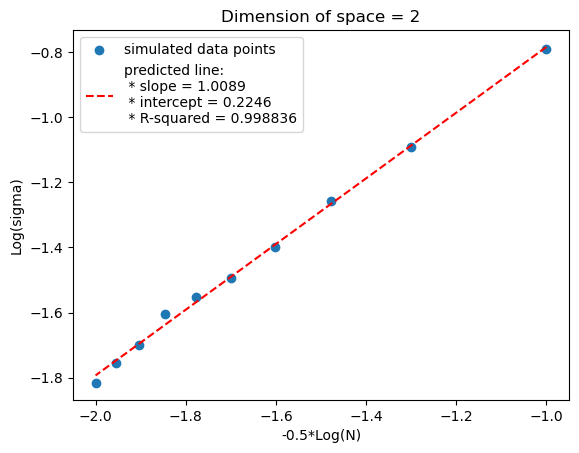

In [20]:
#Example: D=2
plot_logsigma_halflogN(2,list_of_N)

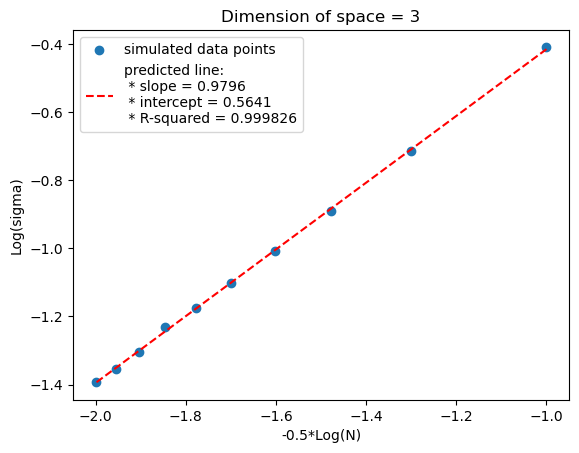

In [21]:
#Example: D=3
plot_logsigma_halflogN(3,list_of_N)

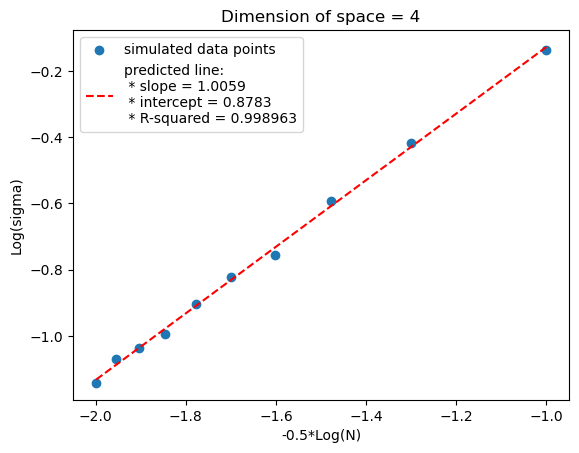

In [22]:
#Example: D=4
plot_logsigma_halflogN(4,list_of_N)

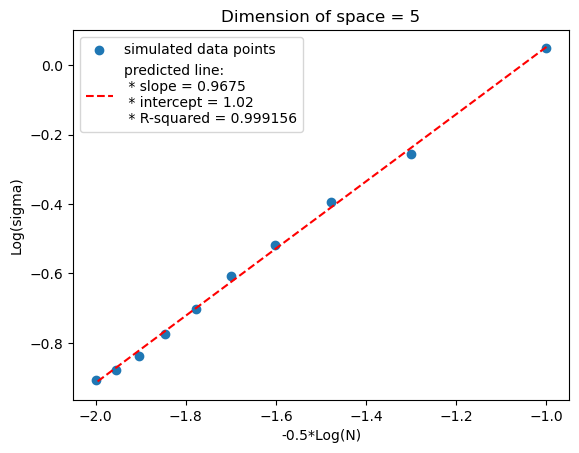

In [23]:
#Example: D=5
plot_logsigma_halflogN(5,list_of_N)

In [24]:
#FINAL COMMENT:
# In the plots above, N increases from right to left. Hence, the more we increase N,
# the smaller Log(sigma) becomes, and hence the smaller sigma becomes -- which is what we should expect.
# All graphs show a linear correlation between Log(sigma) and -0.5*Log(N), with slope ~1, which means that
# ... in the limit N-> +\infinity, Log(sigma) -> -\infinity, and so sigma->0 as the central limit theorem says.